# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

Adding Images
Display an image in a Text cell, use an HTML <img> tag with the URL of the image. For example:

<img src="https://i.imgur.com/49FNOHj.jpg">
<img src="assets/bricks.jpg">


# Import Statements

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [64]:
#From there we can read the .csv file and take a look at the first 5 rows.
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [65]:
#We see that there are 5 columns, which include the name of the colour and its corresponding RGB value. To find the number of unique colours, all we need to do is check if every entry in the name column is unique: 
colors['name'].nunique()

135

This shows us that there are 135 unique colours for LEGO blocks.

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [66]:
#One way you can do this is through combining our old friend, the .groupby() method, with the .count() method.
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [67]:
#But you might have also come across the very handy .value_counts() method in your research.
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

Once again, we select the column (here with the .dot notation) and call the method. The .value_counts() method is a very quick way of finding the number of members of each category.

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [68]:
#Can you take the first steps in exploring this dataset? Read the .csv and take a look at the columns.
sets = pd.read_csv('data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [69]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [70]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [71]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [72]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [73]:
#Now, let's create a new Series called sets_by_year which has the years as the index and the number of sets as the value. The result should look something like this:
#The trick is grouping the data by the year and counting the number of entries for that year.
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [74]:
sets_by_year['set_num'].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!

You also notice that there is an entry for 2021. The .csv file is from late 2020, so it appears that it already includes some sets on a forward-looking basis. We'll have to take this into account for our charts:

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

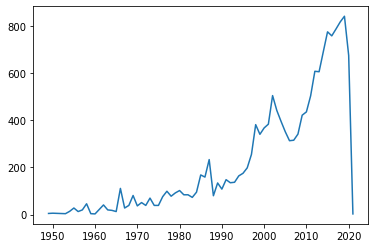

In [75]:
#Having summed the number of LEGO sets per year, visualise this data using a line chart with Matplotlib. You should get something like this:
plt.plot(sets_by_year.index, sets_by_year.set_num)

If we don't exclude the last two years we get a dramatic drop at the end of the chart. This is quite misleading as it suggests LEGO is in big trouble! Given the dataset does not include a full calendar year for 2020, it's best to exclude the last two rows to get a better picture:

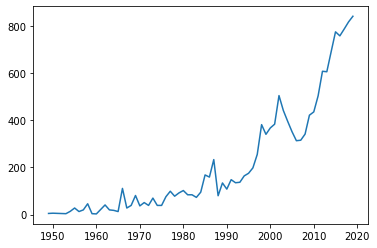

In [76]:
#Because the .csv file is from late 2020, to plot the full calendar years, you will have to exclude some data from your chart. Use the slicing techniques to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. You should get this:

plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

Often you find yourself needing to summarise data. This is where the .groupby() function comes in really handy. However, sometimes you want to run even more operations based on a particular DataFrame column. This is where the .agg() method comes in.

In our case, we want to calculate the number of different themes by calendar year. This means we have to group the data by year and then count the number of unique theme_ids for that year.

In [77]:
#Number of Themes per Calendar Year
#We can accomplish this by chaining the .groupby() and the .agg() functions together:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

Note, the .agg() method takes a dictionary as an argument. In this dictionary, we specify which operation we'd like to apply to each column. In our case, we just want to calculate the number of unique entries in the theme_id column by using our old friend, the .nunique() method.

In [78]:
#Let's give our column in themes_by_year a more appropriate name and let's take a look at what we've got:
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True) 
themes_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [79]:
themes_by_year.tail()

,nr_themes
year,
2017,89
2018,93
2019,78
2020,82
2021,1


Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years. Let's plot this on a chart again.

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

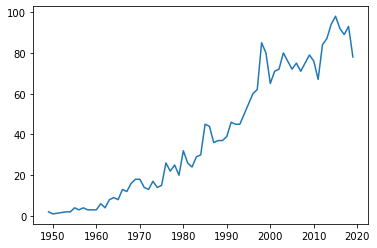

In [80]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Again, we're using the same slicing technique as before. In the chart, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010s.

### Line Charts with Two Seperate Axes

Wouldn't it be nice to have the number of themes and the number sets on the same chart? But what do we get if we just plot both of them the way we have before? 

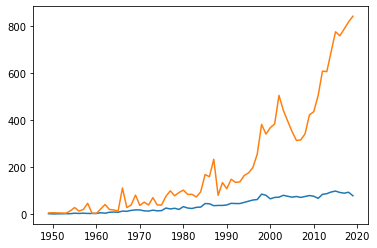

In [81]:
# This looks terrible
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

Well, that's not very informative! 🤦‍♀️ The problem is that the "number of themes" and the "number of sets" have very different scales. The theme number ranges between 0 and 90, while the number of sets ranges between 0 and 900. So what can we do?

**Two Separate Axes**

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

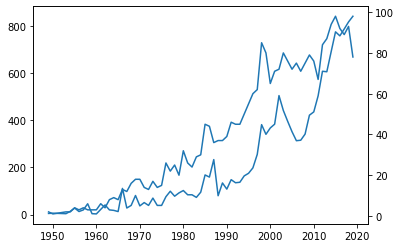

In [82]:
#We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:

ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

That's very nice! But there's one problem: we can't tell the lines apart because they have the same colour! Let's add some styling. Let's:

-colour in the lines
-colour in the axes and
-add some labels

so that we can see what's going on. Here's what we get:

Text(0, 0.5, 'Number of Themes')

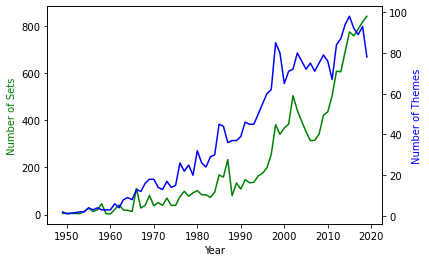

In [83]:
ax1 = plt.gca()
ax2 = ax1.twinx()

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Complexity Over Time**

Have LEGO sets become larger and more complex over time? Let's work out the average number of parts per LEGO set. This is the perfect time to revise how to use the .agg() function.

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

Once again, we're going to use the .groupby() and the .agg() function together to work this one out. However, this time we pass a dictionary to the .agg() function so that we will target the num_parts column with the mean() function. That way, we group our data by year and then we average the number of parts for that year.

In [84]:
#Create a Pandas Series called parts_per_set that has the year as the index and contains the average number of parts per LEGO set in that year. Here's what you're looking to create:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [85]:
parts_per_set.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

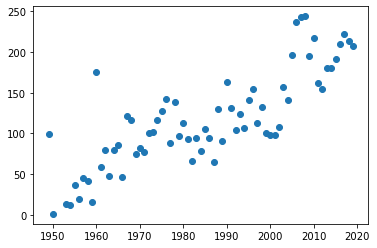

In [86]:
#We just need to call the .scatter() instead of the .plot() method to create the chart. For the x-values, we'll use the index of the parts_per_set Series (the years) and for the y-values, we'll use the values of the series (the column name happens to be num_parts).

plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines!

In [87]:
#To count the number of sets per Theme we can use the .value_counts() method on our theme_id column. But there's one problem:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

We have no idea what our themes are actually called! 🤨 Ok, we can see that the theme with id 158 is the largest theme containing 753 individual sets, but what's that theme called? This is not very helpful. We need to find the names of the themes based on the theme_id from the themes.csv file.

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Working with a Relational Database**

What is a database schema? A schema is just how the database is organised. Many relational databases, such as our LEGO data, is split into individual tables. We have separate tables for the colours, the sets and the thems. With a relational database, the tables are linked to each other through their keys.

**Understand the theme.csv file**

The themes.csv file has the actual theme names. How is this table linked to the others tables? Well, the sets .csv has theme_ids which match the id column in the themes.csv.
This means that the theme_id is the foreign key inside the sets.csv. Many different sets can be part of the same theme. But inside the themes.csv, each theme_id, which is just called id is unique. This uniqueness makes the id column the primary key inside the themes.csv. To see this in action, explore the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [88]:
#Looking at the first 5 rows, we see the column names. Each value in the id column is unique (this is the primary key for the themes table). The theme names are not unique. 
themes = pd.read_csv('data/themes.csv') # has the theme names!
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [89]:
#If we search for the name "Star Wars", we see that 4 different ids correspond to that name.
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [90]:
#Why would Star Wars have so many different themes? We can check which products corresponded to those themes in the sets.csv:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [91]:
#Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters. What about, say theme 209?
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


Here we see that all of the Star Wars Advent Calendars share the same theme_id. That makes sense.

### Merging (i.e., Combining) DataFrames based on a Key


Wouldn't it be nice if we could combine our data on theme names with the number sets per theme? 

Let's use the .merge() method to combine two separate DataFrames into one. The merge method works on columns with the same name in both DataFrames.

Currently, our theme_ids and our number of sets per theme live inside a Series called set_theme_count.

In [92]:
#To make sure we have a column with the name id, I'll convert this Pandas Series into a Pandas DataFrame.
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()
#Here I'm providing a dictionary to create the DataFrame. The keys in the dictionary become my column names.

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


**The Pandas .merge() function**

To .merge() two DataFrame along a particular column, we need to provide our two DataFrames and then the column name on which to merge. This is why we set on='id'. Both our set_theme_count and our themes DataFrames have a column with this name.

In [93]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


Aha! Star Wars is indeed the theme with the most LEGO sets. Let's plot the top 10 themes on a chart.

**Creating a Bar Chart**

Matplotlib can create almost any chart imaginable with very few lines of code. Using .bar() we can provide our theme names and the number of sets. This is what we get:

<BarContainer object of 10 artists>

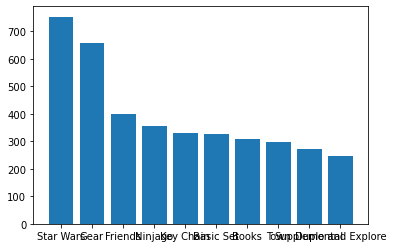

In [94]:
# Basic, but unreadable
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

That worked, but it's almost unreadable. 😩 The good thing for us is that we already know how to customize our charts! Here's what we get when we increase the size of our figure, add some labels, and most importantly, rotate the category names on the x-axis so that they don't overlap.

<BarContainer object of 10 artists>

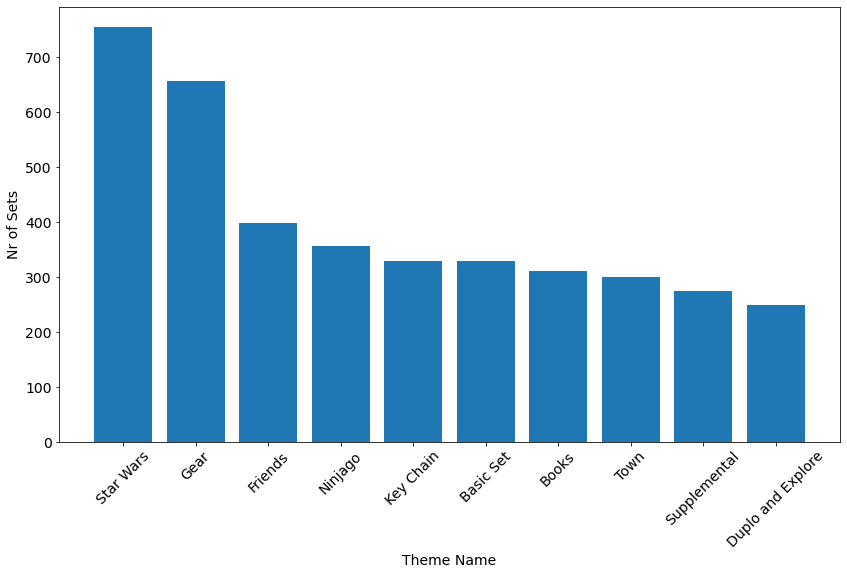

In [95]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])



Niiiiice.😌 So what can we see here? Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! I guess I'm showing my age here, but it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks. The 'Gear' category itself is huge and includes everything from bags to pencil cases apparently. Has LEGO strayed from its core business or is it successfully diversifying? That we can't answer from our dataset. I'll leave that one up to a business school case study to decide. 🤷‍♀️

<h1>Learning Points & Summary

In this lesson we looked at how to:

<li>use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

<li>combine the groupby() and count() functions to aggregate data

<li>use the .value_counts() function

<li>slice DataFrames using the square bracket notation e.g., df[:-2] or df[:10]

<li>use the .agg() function to run an operation on a particular column

<li>rename() columns of DataFrames

<li>create a line chart with two separate axes to visualise data that have different scales.

<li>create a scatter plot in Matplotlib

<li>work with tables in a relational database by using primary and foreign keys

<li>.merge() DataFrames along a particular column

<li>create a bar chart with Matplotlib